<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300">

---
# **True Range and Average True Range**


#### Metodologia para cálculo dos indicadores e trailing stop
---

# 1 - Bibliotecas

In [2]:
import numpy as np
import pandas as pd
from scipy.ndimage import shift
from datetime import datetime, timedelta, date, time
import pytz
import yfinance as yf
import mplfinance as mpf
#import MetaTrader5 as mt5

# 2 - Obtenção dos dados

In [3]:
df = yf.download('^BVSP', start='2022-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,104823.00000,106125.0000,103413.000000,103922.00000,103922.00000,11128500
2022-01-04,103922.00000,104276.0000,103096.000000,103514.00000,103514.00000,11491600
2022-01-05,103514.00000,103514.0000,100850.000000,101006.00000,101006.00000,0
2022-01-06,101006.00000,102235.0000,101000.000000,101561.00000,101561.00000,11749200
2022-01-07,101561.00000,102719.0000,101104.000000,102719.00000,102719.00000,11733200
...,...,...,...,...,...,...
2023-04-27,102310.00000,103177.0000,101975.000000,102923.00000,102923.00000,11302800
2023-04-28,102923.00000,104432.0000,102449.000000,104432.00000,104432.00000,13080900
2023-05-02,104431.00000,104447.0000,101569.000000,101927.00000,101927.00000,12018000


# 3 - Criar funções para localizar os sinais de entrada

In [27]:
df['Close_ant'] = df['Close'].shift(1)

In [31]:
def TR(df):
    
    high_low = df['High'] - df['Low']
    high_closeant = np.abs(df['High'] - df['Close'].shift(1))
    low_closeant = np.abs(df['Low'] - df['Close'].shift(1))
    tr = max(high_low, high_closeant, low_closeant)

    return tr

In [32]:
TR(df)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [28]:
def gap(df):
    
    gap = df['Open'] - df['Close'].shift(1)

    return gap

In [30]:
gap(df)

Date
2022-01-03        NaN
2022-01-04    0.00000
2022-01-05    0.00000
2022-01-06    0.00000
2022-01-07    0.00000
               ...   
2023-04-27   -2.00000
2023-04-28    0.00000
2023-05-02   -1.00000
2023-05-03    0.00000
2023-05-04    0.90625
Length: 334, dtype: float64

In [29]:
df.apply(lambda x : gap(x), axis=1)

AttributeError: 'numpy.float64' object has no attribute 'shift'

In [22]:
row = df.iterrows
row

<bound method DataFrame.iterrows of                     Open         High            Low         Close  \
Date                                                                 
2022-01-03  104823.00000  106125.0000  103413.000000  103922.00000   
2022-01-04  103922.00000  104276.0000  103096.000000  103514.00000   
2022-01-05  103514.00000  103514.0000  100850.000000  101006.00000   
2022-01-06  101006.00000  102235.0000  101000.000000  101561.00000   
2022-01-07  101561.00000  102719.0000  101104.000000  102719.00000   
...                  ...          ...            ...           ...   
2023-04-27  102310.00000  103177.0000  101975.000000  102923.00000   
2023-04-28  102923.00000  104432.0000  102449.000000  104432.00000   
2023-05-02  104431.00000  104447.0000  101569.000000  101927.00000   
2023-05-03  101927.00000  102331.0000  101433.000000  101797.00000   
2023-05-04  101797.90625  103320.8125  101063.492188  102174.34375   

               Adj Close    Volume  
Date            

In [ ]:
df_dias_separados = [x for _, x in df_ativo.groupby('data')]

In [ ]:
pd.Series([TR(df) for (priority, due_date) in zip(df['priority'], df['due_date'])
  ])

In [ ]:
pd.Series([
    eisenhower_action(priority == 'HIGH', due_date <= cutoff_date)
    for (priority, due_date) in zip(df['priority'], df['due_date'])
  ])

In [16]:
df.apply(lambda x: TR(x))

KeyError: 'High'

In [ ]:
def TR(df):
    ls_TR = []
    high_low = df['high'] - df['low']
    high_closeant = np.abs(df['high'] - df['close'].shift(1))
    low_closeant = np.abs(df['low'] - df['close'].shift(1))

    ls_TR.append(max(high_low[i], high_closeant[i], low_closeant[i]))


In [469]:
def parametros_df_diario(df, periodo_mmTR=9, perc_entrada_TR=1.45, perc_sl=0.5, perc_tp=0.5):

    df_diario = df.resample('1D').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 'real_volume':'sum', 'ticker': 'first'})
    df_diario = df_diario.dropna()
    
    # Cálculo True Range (TR) e média móvel do TR
    
    ls_TR = []

    high_low = df_diario['high'] - df_diario['low']
    high_closeant = np.abs(df_diario['high'] - df_diario['close'].shift(1))
    low_closeant = np.abs(df_diario['low'] - df_diario['close'].shift(1))
    
    for i in range(len(df_diario)):
        ls_TR.append(max(high_low[i], high_closeant[i], low_closeant[i]))
    
    df_diario['TR_diario'] = ls_TR
    df_diario['mm_TR_diario'] = df_diario['TR_diario'].ewm(span=periodo_mmTR, adjust=False).mean()

    # Cálculo condicionais abertura

    df_diario['close_dia_ant'] = df_diario.close.shift(1)
    df_diario['open_dia'] = df_diario.open
    df_diario['close_mais_mmTR'] = df_diario['close_dia_ant'] + perc_entrada_TR * df_diario['mm_TR_diario']
    df_diario['close_3cdl_intra'] = df.groupby('data')['close'].apply(lambda x: x.shift(-2).values[0])
    df_diario['cond1'] = df_diario['open'] > df_diario['close_mais_mmTR']
    df_diario['cond2'] = df_diario['close_3cdl_intra'] > df_diario['open']
    df_diario['cond_venda'] = df_diario['cond1'] & df_diario['cond2']

    # Stop loss e Take profit
    df_diario = df_diario[df_diario.cond_venda==True]
    df_diario['stop_loss'] = df_diario['close_3cdl_intra'] + (perc_sl * df_diario['mm_TR_diario'])
    df_diario['take_profit'] = df_diario['close_3cdl_intra'] - (perc_tp * df_diario['mm_TR_diario'])
    merge_dfs = pd.merge(df, df_diario[['open_dia', 'close_dia_ant', 'mm_TR_diario', 'cond_venda', 'close_3cdl_intra', 'stop_loss', 'take_profit']], left_on='data', right_index=True, how='inner')

    return merge_dfs

In [473]:
ls_df_dia_ativo = []

for df in ls_df_ohlc:
    df_ativo = parametros_df_diario(df)
    
    if not df_ativo.empty:
        df_dias_separados = [x for _, x in df_ativo.groupby('data')]

        for df_dia in df_dias_separados:
            ls_df_dia_ativo.append(df_dia)

In [471]:
for i in ls_df_dia_ativo:
    print(i.ticker[0], i.data[0].date())

WDO$ 2020-03-09
ABEV3 2019-07-25
ABEV3 2021-05-06
ABEV3 2021-10-28
ARZZ3 2020-10-23
AZUL4 2019-03-11
BBAS3 2022-10-03
BRKM5 2018-06-15
CCRO3 2021-05-07
CPLE6 2019-11-13
CRFB3 2020-07-28
ELET6 2021-06-18
GOLL4 2020-11-09
HAPV3 2019-08-14
MRVE3 2018-12-21
NTCO3 2018-05-11
NTCO3 2022-10-18
NTCO3 2023-01-30
PETR3 2021-08-05
PETR3 2022-10-03
SLCE3 2020-11-27
VBBR3 2021-01-26
VIIA3 2019-05-03


In [475]:
def sl_tp(df, i):

    cond_sl = df.high[i] >= df.stop_loss[i]
    cond_tp = df.low[i] <= df.take_profit[i]

    if cond_sl==True:
        return 'stop_loss'
    elif cond_tp==True:
        return 'take_profit'

# 4 - Backtesting

In [476]:
operacoes_compra = {'ativo':[], 'data_entrada':[], 'preco_entrada':[], 'preco_saida':[], 'sl_tp':[]}

for df in ls_df_dia_ativo:

    position = 1
    
    for i in range(2, len(df)):

        if (position==1) and (sl_tp(df, i)=='stop_loss'):
            operacoes_compra['ativo'].append(df.ticker[0])
            operacoes_compra['data_entrada'].append(df.data[0].date())
            operacoes_compra['preco_entrada'].append(df.close_3cdl_intra[0])
            operacoes_compra['preco_saida'].append(df.stop_loss[0])
            operacoes_compra['sl_tp'].append('stop_loss')
            position=0

        elif (position==1) and (sl_tp(df, i)=='take_profit'):
            operacoes_compra['ativo'].append(df.ticker[0])
            operacoes_compra['data_entrada'].append(df.data[0].date())
            operacoes_compra['preco_entrada'].append(df.close_3cdl_intra[0])
            operacoes_compra['preco_saida'].append(df.take_profit[0])
            operacoes_compra['sl_tp'].append('take_profit')
            position=0
        
        elif (position==1) and (i==(len(df)-1)):
            operacoes_compra['ativo'].append(df.ticker[0])
            operacoes_compra['data_entrada'].append(df.data[0].date())
            operacoes_compra['preco_entrada'].append(df.close_3cdl_intra[0])
            operacoes_compra['preco_saida'].append(df.close[-2])
            operacoes_compra['sl_tp'].append('fim_dia')
            position=0

df_operacoes_compra = pd.DataFrame.from_dict(operacoes_compra, orient='index').transpose()
df_operacoes_compra['resultado'] = (df_operacoes_compra['preco_entrada'] - df_operacoes_compra['preco_saida']) / df_operacoes_compra['preco_entrada'] *100
df_operacoes_compra

,ativo,data_entrada,preco_entrada,preco_saida,sl_tp,resultado
0,WDO$,2020-03-09,5578.056,5530.359351,take_profit,0.855077
1,ABEV3,2019-07-25,17.11,17.26,fim_dia,-0.87668
2,ABEV3,2021-05-06,14.81,14.555419,take_profit,1.718984
3,ABEV3,2021-10-28,15.33,15.008698,take_profit,2.095903
4,ARZZ3,2020-10-23,55.16,56.586681,stop_loss,-2.586441
5,AZUL4,2019-03-11,39.75,39.33,fim_dia,1.056604
6,BBAS3,2022-10-03,39.53,38.764009,take_profit,1.937746
7,BRKM5,2018-06-15,40.95,40.92,fim_dia,0.07326
8,CCRO3,2021-05-07,13.03,12.711448,take_profit,2.444756
9,CPLE6,2019-11-13,4.14,4.076188,take_profit,1.541352


In [477]:
df_operacoes_compra['resultado'].sum()

12.238391640929251

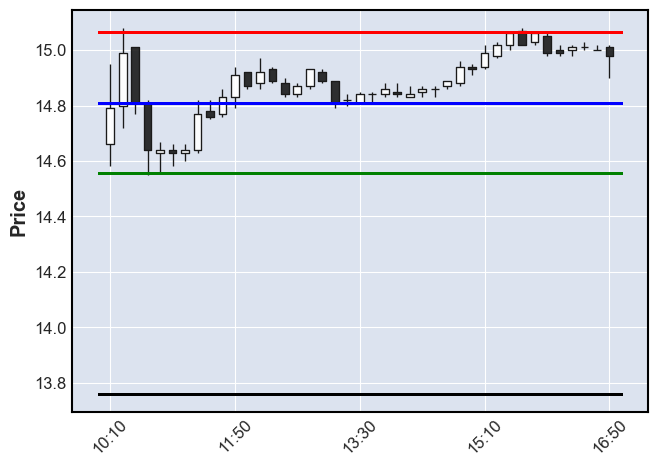

In [480]:
df_figure = ls_df_dia_ativo[2]
tuple_alvo = list(df_figure[['close_dia_ant', 'close_3cdl_intra', 'take_profit', 'stop_loss']].itertuples(index=False))[0]

mpf.plot(df_figure, type='candle', hlines=dict(hlines=[*tuple_alvo],colors=['black', 'blue', 'green', 'red']))

# 5. Screening ativos

In [510]:
def parametros_df_diario(df, periodo_mmTR=9, perc_entrada_TR=1.45, perc_sl=0.5, perc_tp=0.5):

    df_diario = df.resample('1D').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 'real_volume':'sum', 'ticker': 'first'})
    df_diario = df_diario.dropna()
    
    # Cálculo True Range (TR) e média móvel do TR
    
    ls_TR = []

    high_low = df_diario['high'] - df_diario['low']
    high_closeant = np.abs(df_diario['high'] - df_diario['close'].shift(1))
    low_closeant = np.abs(df_diario['low'] - df_diario['close'].shift(1))
    
    for i in range(len(df_diario)):
        ls_TR.append(max(high_low[i], high_closeant[i], low_closeant[i]))
    
    df_diario['TR_diario'] = ls_TR
    df_diario['mm_TR_diario'] = df_diario['TR_diario'].ewm(span=periodo_mmTR, adjust=False).mean()

    # Cálculo condicionais abertura

    df_diario['close_dia_ant'] = df_diario.close.shift(1)
    df_diario['open_dia'] = df_diario.open
    df_diario['close_mais_mmTR'] = df_diario['close_dia_ant'] + perc_entrada_TR * df_diario['mm_TR_diario']
    df_diario['close_3cdl_intra'] = df.groupby('data')['close'].apply(lambda x: x.shift(-2).values[0])
    df_diario['cond1'] = df_diario['open'] > df_diario['close_mais_mmTR']
    df_diario['cond2'] = df_diario['close_3cdl_intra'] > df_diario['open']
    df_diario['cond_venda'] = df_diario['cond1'] & df_diario['cond2']

    df_diario['gap'] = (df_diario['open_dia'] - df_diario['close_dia_ant']) / df_diario['close_dia_ant'] * 100

    # Stop loss e Take profit
    #df_diario = df_diario[df_diario.cond_venda==True]
    df_diario['stop_loss'] = df_diario['close_3cdl_intra'] + (perc_sl * df_diario['mm_TR_diario'])
    df_diario['take_profit'] = df_diario['close_3cdl_intra'] - (perc_tp * df_diario['mm_TR_diario'])
    merge_dfs = pd.merge(df, df_diario[['gap', 'open_dia', 'close_dia_ant', 'mm_TR_diario', 'cond_venda', 'close_3cdl_intra', 'stop_loss', 'take_profit']], left_on='data', right_index=True, how='inner')

    return merge_dfs

In [511]:
timezone = pytz.timezone("America/Sao_Paulo")
mt5.initialize()

while datetime.now().time() < time(10, 30, 0, 0):
    sleep(5)

data_inicio = datetime.now() - timedelta(days=10)
data_fim = datetime.now()

ls_df_ohlc = []

for ticker in lista_tickers:

    ohlc_ticker = mt5.copy_rates_range(ticker, mt5.TIMEFRAME_M10, data_inicio, data_fim)
    ohlc_ticker = pd.DataFrame(ohlc_ticker)
    ohlc_ticker['ticker'] = str(ticker)
    ohlc_ticker['timeframe']  = '10min'
    ohlc_ticker.index = pd.to_datetime(ohlc_ticker['time'], unit='s')
    ohlc_ticker = ohlc_ticker.drop('time', axis=1)
    ohlc_ticker['data'] = pd.to_datetime(ohlc_ticker.index.date)
    ohlc_ticker['horario'] = ohlc_ticker.index.time
    
    ls_df_ohlc.append(ohlc_ticker)

ls_df_dia_ativo = []
index_ativos=0
for df in ls_df_ohlc:
    df_ativo = parametros_df_diario(df)
    print((index_ativos, df_ativo.ticker[-1], round(df_ativo.gap[-1], 2)))
    df_ativo = df_ativo[df_ativo.data==str(datetime.today().date())]
    ls_df_dia_ativo.append(df_ativo)
    index_ativos += 1

(0, 'WDO$', -0.36)
(1, 'WIN$', 0.05)
(2, 'ABEV3', 4.25)
(3, 'ALPA4', 1.9)
(4, 'ALSO3', 0.71)
(5, 'ARZZ3', 0.91)
(6, 'ASAI3', 1.83)
(7, 'AZUL4', 0.35)
(8, 'B3SA3', 0.87)
(9, 'BBAS3', 0.7)
(10, 'BBDC3', 0.99)
(11, 'BBDC4', 0.51)
(12, 'BBSE3', 0.03)
(13, 'BEEF3', 0.35)
(14, 'BPAC11', 0.49)
(15, 'BPAN4', 0.39)
(16, 'BRAP4', 0.0)
(17, 'BRFS3', -0.47)
(18, 'BRKM5', 0.42)
(19, 'CASH3', 2.47)
(20, 'CCRO3', 0.29)
(21, 'CIEL3', 1.29)
(22, 'CMIG4', 0.82)
(23, 'CMIN3', 3.13)
(24, 'COGN3', 1.57)
(25, 'CPFE3', 0.36)
(26, 'CPLE6', 0.25)
(27, 'CRFB3', 1.27)
(28, 'CSAN3', 0.49)
(29, 'CSNA3', -0.47)
(30, 'CVCB3', 0.37)
(31, 'CYRE3', 0.47)
(32, 'DXCO3', 1.32)
(33, 'ECOR3', 1.32)
(34, 'EGIE3', 0.5)
(35, 'ELET3', 0.81)
(36, 'ELET6', 1.28)
(37, 'EMBR3', -1.6)
(38, 'ENBR3', -0.09)
(39, 'ENEV3', 2.41)
(40, 'ENGI11', 0.92)
(41, 'EQTL3', 1.29)
(42, 'EZTC3', 2.11)
(43, 'FLRY3', 0.55)
(44, 'GGBR4', 1.38)
(45, 'GOAU4', 0.09)
(46, 'GOLL4', 0.29)
(47, 'HAPV3', 1.81)
(48, 'HYPE3', 1.15)
(49, 'IGTI11', 1.67)
(50, 'ITS

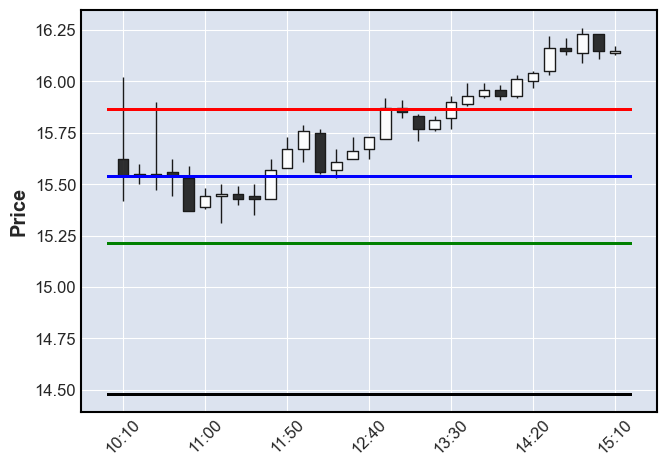

In [512]:
df_figure = ls_df_dia_ativo[82]
tuple_alvo = list(df_figure[['close_dia_ant', 'close_3cdl_intra', 'take_profit', 'stop_loss']].itertuples(index=False))[0]

mpf.plot(df_figure, type='candle', hlines=dict(hlines=[*tuple_alvo],colors=['black', 'blue', 'green', 'red']))

In [513]:
ls_df_dia_ativo[82]

,open,high,low,close,tick_volume,spread,real_volume,ticker,timeframe,data,horario,gap,open_dia,close_dia_ant,mm_TR_diario,cond_venda,close_3cdl_intra,stop_loss,take_profit
time,,,,,,,,,,,,,,,,,,,
2023-05-04 10:10:00,15.62,16.02,15.42,15.54,1174,0,2692400,UGPA3,10min,2023-05-04,10:10:00,7.872928,15.62,14.48,0.650572,False,15.54,15.865286,15.214714
2023-05-04 10:20:00,15.54,15.60,15.50,15.55,488,1,733100,UGPA3,10min,2023-05-04,10:20:00,7.872928,15.62,14.48,0.650572,False,15.54,15.865286,15.214714
2023-05-04 10:30:00,15.55,15.90,15.47,15.54,1091,1,1311000,UGPA3,10min,2023-05-04,10:30:00,7.872928,15.62,14.48,0.650572,False,15.54,15.865286,15.214714
2023-05-04 10:40:00,15.56,15.62,15.44,15.54,1466,1,2059700,UGPA3,10min,2023-05-04,10:40:00,7.872928,15.62,14.48,0.650572,False,15.54,15.865286,15.214714
2023-05-04 10:50:00,15.53,15.59,15.37,15.37,649,1,1281800,UGPA3,10min,2023-05-04,10:50:00,7.872928,15.62,14.48,0.650572,False,15.54,15.865286,15.214714
2023-05-04 11:00:00,15.39,15.48,15.38,15.44,435,1,733100,UGPA3,10min,2023-05-04,11:00:00,7.872928,15.62,14.48,0.650572,False,15.54,15.865286,15.214714
2023-05-04 11:10:00,15.44,15.50,15.31,15.45,569,1,630600,UGPA3,10min,2023-05-04,11:10:00,7.872928,15.62,14.48,0.650572,False,15.54,15.865286,15.214714
2023-05-04 11:20:00,15.45,15.49,15.40,15.43,691,1,497500,UGPA3,10min,2023-05-04,11:20:00,7.872928,15.62,14.48,0.650572,False,15.54,15.865286,15.214714
2023-05-04 11:30:00,15.44,15.50,15.35,15.43,807,1,502300,UGPA3,10min,2023-05-04,11:30:00,7.872928,15.62,14.48,0.650572,False,15.54,15.865286,15.214714


In [506]:
def parametros_df_diario(df, periodo_mmTR=9, perc_entrada_TR=1.0, perc_sl=0.5, perc_tp=0.5):

    df_diario = df.resample('1D').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 'real_volume':'sum', 'ticker': 'first'})
    df_diario = df_diario.dropna()
    
    # Cálculo True Range (TR) e média móvel do TR
    
    ls_TR = []

    high_low = df_diario['high'] - df_diario['low']
    high_closeant = np.abs(df_diario['high'] - df_diario['close'].shift(1))
    low_closeant = np.abs(df_diario['low'] - df_diario['close'].shift(1))
    
    for i in range(len(df_diario)):
        ls_TR.append(max(high_low[i], high_closeant[i], low_closeant[i]))
    
    df_diario['TR_diario'] = ls_TR
    df_diario['mm_TR_diario'] = df_diario['TR_diario'].ewm(span=periodo_mmTR, adjust=False).mean()

    # Cálculo condicionais abertura

    df_diario['close_dia_ant'] = df_diario.close.shift(1)
    df_diario['open_dia'] = df_diario.open
    df_diario['close_mais_mmTR'] = df_diario['close_dia_ant'] + perc_entrada_TR * df_diario['mm_TR_diario']
    df_diario['close_3cdl_intra'] = df.groupby('data')['close'].apply(lambda x: x.shift(-2).values[0])
    df_diario['cond1'] = df_diario['open'] > df_diario['close_mais_mmTR']
    df_diario['cond2'] = df_diario['close_3cdl_intra'] > df_diario['open']
    df_diario['cond_venda'] = df_diario['cond1'] & df_diario['cond2']

    # Stop loss e Take profit
    df_diario = df_diario[df_diario.cond_venda==True]
    df_diario['stop_loss'] = df_diario['close_3cdl_intra'] + (perc_sl * df_diario['mm_TR_diario'])
    df_diario['take_profit'] = df_diario['close_3cdl_intra'] - (perc_tp * df_diario['mm_TR_diario'])
    merge_dfs = pd.merge(df, df_diario[['open_dia', 'close_dia_ant', 'mm_TR_diario', 'cond_venda', 'close_3cdl_intra', 'stop_loss', 'take_profit']], left_on='data', right_index=True, how='inner')

    return merge_dfs

In [507]:
timezone = pytz.timezone("America/Sao_Paulo")
mt5.initialize()

while datetime.now().time() < time(10, 30, 0, 0):
    sleep(5)

data_inicio = datetime.now() - timedelta(days=10)
data_fim = datetime.now()

ls_df_ohlc = []

for ticker in lista_tickers:

    ohlc_ticker = mt5.copy_rates_range(ticker, mt5.TIMEFRAME_M10, data_inicio, data_fim)
    ohlc_ticker = pd.DataFrame(ohlc_ticker)
    ohlc_ticker['ticker'] = str(ticker)
    ohlc_ticker['timeframe']  = '10min'
    ohlc_ticker.index = pd.to_datetime(ohlc_ticker['time'], unit='s')
    ohlc_ticker = ohlc_ticker.drop('time', axis=1)
    ohlc_ticker['data'] = pd.to_datetime(ohlc_ticker.index.date)
    ohlc_ticker['horario'] = ohlc_ticker.index.time
    
    ls_df_ohlc.append(ohlc_ticker)


ls_df_dia_ativo = []
for df in ls_df_ohlc:
    df_ativo = parametros_df_diario(df)
    
    if not df_ativo.empty:
        print(df_ativo.ticker[0])
        ls_df_dia_ativo.append(df_ativo)

LREN3


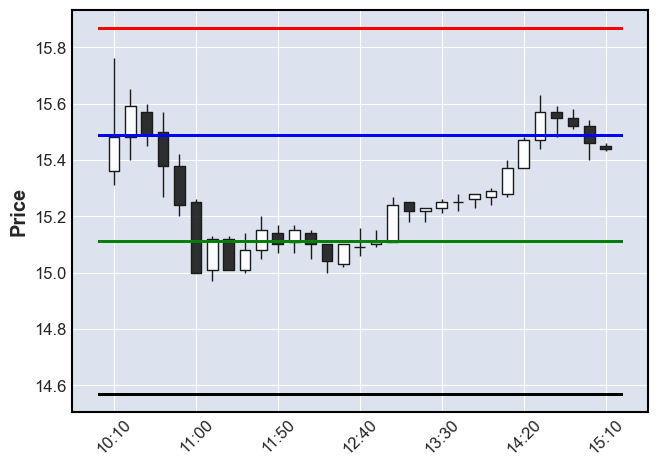

In [508]:
df_figure = ls_df_dia_ativo[0]
tuple_alvo = list(df_figure[['close_dia_ant', 'close_3cdl_intra', 'take_profit', 'stop_loss']].itertuples(index=False))[0]

mpf.plot(df_figure, type='candle', hlines=dict(hlines=[*tuple_alvo],colors=['black', 'blue', 'green', 'red']))